#### Chuẩn bị data: các bước giống với lúc trích xuất data cho tập train

B1: Tạo 1 folder đặt tên data_testing là thư mục con của data_testing<br/>
B2: Download video testing và lưu vào folder đó

In [43]:
# Thêm autoreload vào để tự động reload lại module nếu có thay đổi code trong module
%load_ext autoreload
%autoreload 2

import mediapipe as mp
import pandas as pd
import os, sys
import warnings

# Thêm đường dẫn dẫn đến thư mục cha
sys.path.append(os.path.abspath(".."))
warnings.filterwarnings("ignore")

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

from utils.common import load_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# Load model
RF_model = load_model('./best_models/RF_model_side.pkl')

# Load input scaler
input_scaler = load_model("./best_models/input_scaler.pkl")

### 1. Determine important landmarks for plank

In [45]:
def get_class(encode_label: float):
    return {
        0: "D",
        1: "M",
        2: "U"
    }.get(encode_label, "Unknown")

#### Testing

In [46]:
test_df = pd.read_csv("test.csv")

In [47]:
test_df.shape

(130, 28)

In [48]:
test_df.head()

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_ankle_x,right_ankle_y,right_ankle_z
0,U,-0.024319,-0.234752,-0.375662,0.053144,-0.182168,-0.402990,-0.028921,-0.183949,0.171881,...,-0.030561,0.011797,0.112353,0.327272,0.031191,0.237747,0.131690,0.027727,0.214417,0.529045
1,U,-0.130176,-0.234457,-0.081936,-0.060349,-0.192072,-0.429274,-0.052834,-0.185919,0.229015,...,0.013369,-0.015849,0.103110,0.437086,-0.009354,0.248813,0.194450,-0.008825,0.202285,0.708589
2,U,-0.124633,-0.230603,-0.138812,-0.042123,-0.191732,-0.453354,-0.059942,-0.186877,0.212735,...,0.006773,-0.029562,0.107254,0.420435,-0.013386,0.247488,0.214887,-0.019945,0.207775,0.694458
3,U,-0.085649,-0.237673,-0.185178,-0.007110,-0.190468,-0.500858,0.006449,-0.180948,0.222193,...,-0.032805,-0.001234,0.107329,0.509381,0.016041,0.242692,0.183664,0.009252,0.198636,0.868994
4,U,-0.025844,-0.236001,-0.381549,0.056188,-0.179667,-0.427141,-0.024589,-0.185527,0.146104,...,0.002790,-0.006260,0.099064,0.397130,0.034533,0.233823,0.194047,0.048964,0.167703,0.665243


In [49]:
X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

#### Chuẩn hoá dữ liệu

In [50]:
X_test = input_scaler.transform(X_test)

In [51]:
X_test

array([[-0.3002616 ,  0.03752466, -1.13232139, ...,  1.42612868,
        -0.13956143,  1.58985313],
       [-1.60499715,  0.04008686,  0.72925709, ...,  0.59551776,
        -0.24335839,  2.36006251],
       [-1.53668181,  0.07358237,  0.36879059, ...,  0.34280873,
        -0.19639184,  2.29944031],
       ...,
       [ 2.37959508,  0.67416146, -0.89608822, ...,  2.02184288,
        -1.25346348, -0.52592162],
       [ 2.70251333,  0.84989127, -0.09463654, ...,  2.62751803,
        -1.43835022, -0.58800275],
       [ 2.91553946,  0.56913454, -0.48163646, ...,  2.64973854,
        -0.6187425 , -0.32144048]])

In [52]:
# Chuyển dữ liệu của label về dạng số
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [53]:
y_pred = RF_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

In [54]:
accuracy

0.7846153846153846

In [55]:
test_df

,label,nose_x,nose_y,nose_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_y,right_shoulder_z,...,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_ankle_x,left_ankle_y,left_ankle_z,right_ankle_x,right_ankle_y,right_ankle_z
0,U,-0.024319,-0.234752,-0.375662,0.053144,-0.182168,-0.402990,-0.028921,-0.183949,0.171881,...,-0.030561,0.011797,0.112353,0.327272,0.031191,0.237747,0.131690,0.027727,0.214417,0.529045
1,U,-0.130176,-0.234457,-0.081936,-0.060349,-0.192072,-0.429274,-0.052834,-0.185919,0.229015,...,0.013369,-0.015849,0.103110,0.437086,-0.009354,0.248813,0.194450,-0.008825,0.202285,0.708589
2,U,-0.124633,-0.230603,-0.138812,-0.042123,-0.191732,-0.453354,-0.059942,-0.186877,0.212735,...,0.006773,-0.029562,0.107254,0.420435,-0.013386,0.247488,0.214887,-0.019945,0.207775,0.694458
3,U,-0.085649,-0.237673,-0.185178,-0.007110,-0.190468,-0.500858,0.006449,-0.180948,0.222193,...,-0.032805,-0.001234,0.107329,0.509381,0.016041,0.242692,0.183664,0.009252,0.198636,0.868994
4,U,-0.025844,-0.236001,-0.381549,0.056188,-0.179667,-0.427141,-0.024589,-0.185527,0.146104,...,0.002790,-0.006260,0.099064,0.397130,0.034533,0.233823,0.194047,0.048964,0.167703,0.665243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,D,0.179874,-0.158018,-0.404375,0.071105,-0.143336,-0.044780,0.090306,-0.133437,-0.680025,...,0.298409,0.162649,0.023411,-0.243787,0.050195,0.060469,0.595997,0.039987,0.093175,0.182084
126,D,0.182626,-0.153853,-0.201260,0.032076,-0.142530,0.136826,0.118730,-0.137709,-0.517066,...,0.499190,0.153295,0.039418,-0.079206,0.046069,0.072491,0.695790,0.020562,0.120178,0.139562
127,D,0.193105,-0.161493,-0.338388,0.090212,-0.148758,-0.024781,0.104265,-0.130535,-0.637805,...,0.281626,0.177786,-0.002287,-0.316560,0.067387,0.040804,0.504129,0.053941,0.084213,0.035834
128,D,0.219304,-0.141272,-0.211933,0.124953,-0.135081,0.010440,0.128749,-0.113165,-0.446095,...,0.267588,0.192921,-0.021122,-0.223245,0.091427,0.020833,0.425417,0.080594,0.062601,0.021362


In [56]:
test_df.to_csv("test.csv", index=False)

### Kết luận

In [57]:
cf = confusion_matrix(y_test, y_pred)

In [58]:
cf

array([[48,  0,  0],
       [ 3, 31,  0],
       [ 0, 25, 23]], dtype=int64)

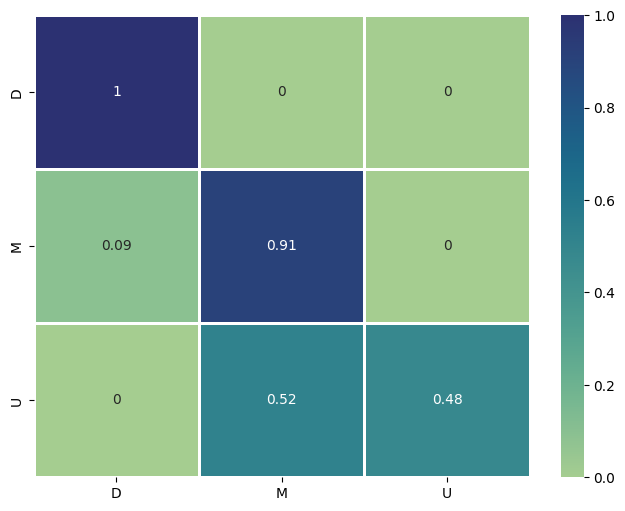

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

label_counts = np.sum(cf, axis=1)
cf = cf / label_counts[:, None]
cm_cross_val = np.round(cf, 2)
confusion_matrix_df = pd.DataFrame(cm_cross_val, index=["D", "M", "U"], columns=["D", "M", "U"])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt="g", cmap="crest");